# Regression Trees & Random Forest Regression

## Libraries and settings

In [ ]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

## Import the apartment data

In [ ]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("./Data/apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [ ]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'pop_dens',
                                                        'mean_taxable_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

### Fit the regression tree model

In [14]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [ ]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y_test, y_pred))

### Print text representation of the regression tree

In [ ]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

### Vizualizing the regression tree

In [ ]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [34]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area', 
                                                            'rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area  rooms     pop_dens  mean_taxable_income  dist_supermarket
456   120    6.5   165.018625          65380.98802       1958.318650
6      65    3.5   525.662252         111422.35870        282.095910
362    90    3.5   424.146342          72133.75058       2606.231069
594    63    2.5  1044.628957          70964.08794        564.607066
439    91    3.5   399.525129          62000.54187        646.823905 

y2_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [35]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf.score(X2_test, y2_test))

R-squared: 0.5481207818328262


### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'mean_taxable_income', 'rooms'], dtype='object')
[0.56749536 0.16751781 0.11611526 0.09147853 0.05739305]


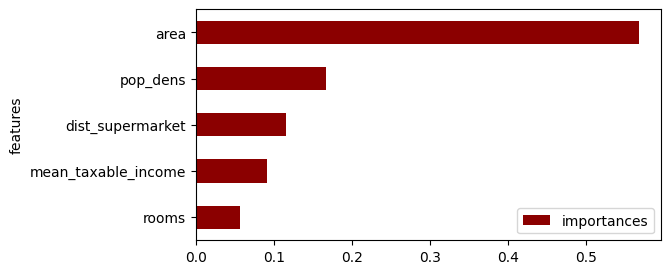

In [36]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

plt.show()

### Task 2b) Change the model parameter max_depth=3 to max_depth=5. This will change the depth (complexity) of the tree. Compare the output (text and graphic) with the output of the original regression tree (in which max_depth=3). Do you see any differences? In the Jupyter notebook, explain why.

In [4]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=5)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

In [ ]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y_test, y_pred))

In [ ]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

### Explanation:

There are now 6 levels (before were only 4). There are now much more criterias like rooms, mean_taxable_income, dist_supermarkets etc. 

### Task 2c) Look at the coefficient of determination (R-squared). Now, go to the section ‘Create train and test samples for the regression tree …’. Drop the two variables area and rooms from the train and test samples. Run the Jupyter notebook again. Does the R-squared value change? If so, explain why in the Jupyter notebook.

Original R-squared: 0.4501765721318767

In [ ]:
# Create train and test samples (the names X7_ and y7_ were used because X_ and y_ were already used above)
X7_train, X7_test, y7_train, y7_test = train_test_split(df[['pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X7_train
print('X7_train:')
print(X7_train.head(), '\n')

# Show y7_train
print('y7_train:')
print(y7_train.head())

In [ ]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg = reg.fit(X7_train, y7_train)

# Predict the response for test dataset
y7_pred = reg.predict(X7_test)

In [ ]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y7_test, y7_pred))

### Explanation: 
Yes the R-squared changes from 0.45 to 0.05. The reason is we removed two variables and now the explanatory variables (Populationdensity, Mean taxable Income, Distance to supermarkets) explain only 5% of the variation of our target value (prices). This is very low.



### Task 2d) Note that ‘features’ is another name for the ‘explanatory variables’ in a Machine Learning (ML) model. The barchart should look like in the exercises:

In [ ]:
cols = X7_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='purple', 
           figsize=(6,3))

plt.show()

### Task 2e) Drop the variable area & run the "create train and test samples" again. Does the drop change the importance of features?

In [31]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X8_train, X8_test, y8_train, y8_test = train_test_split(df[['rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X8_train
print('X8_train:')
print(X8_train.head(), '\n')

# Show y8_train
print('y8_train:')
print(y8_train.head())

X8_train:
     rooms     pop_dens  mean_taxable_income  dist_supermarket
456    6.5   165.018625          65380.98802       1958.318650
6      3.5   525.662252         111422.35870        282.095910
362    3.5   424.146342          72133.75058       2606.231069
594    2.5  1044.628957          70964.08794        564.607066
439    3.5   399.525129          62000.54187        646.823905 

y8_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


In [32]:
X8, y8 = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg8_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg8_rf.fit(X8_train, y8_train)

# Calculate coefficient of determination (R-squared)
print('R-squared8:', reg8_rf.score(X8_test, y8_test))

R-squared8: 0.3215114677246661


Index(['rooms', 'dist_supermarket', 'mean_taxable_income', 'pop_dens'], dtype='object')
[0.39736226 0.27042968 0.17860647 0.15360159]


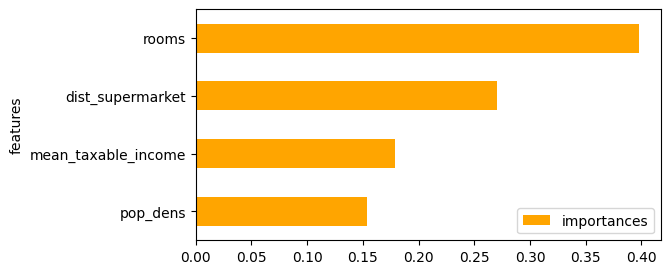

In [37]:
cols8 = X8_train.columns

# Derive feature importance from random forest
importances = reg8_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg8_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols8[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols8,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='orange', 
           figsize=(6,3))

plt.show()

### Explanation: 
Before: Rooms = 0.057, mean_taxable_income = 0.091, dist_supermarket = 0.116 and pop_dens = 0.167

New: Rooms = 0.397, mean_taxable_income = 0.178, dist_supermarket = 0.27 and pop_dens = 0.153

--> because we have an explanatory variable less than in the original.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')